## 1. Import Library

In [1]:
import pandas as pd
import numpy as np

# Data Viz library
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.Read Data

In [2]:
Retail = pd.read_csv("Retail_Transection_Data.csv", engine = 'python')

#Show first 5 rows
Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


## 3.Data Preparation

## Check Missing Value

In [3]:
#Missing Value
Retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [4]:
Retail.shape

(406829, 8)

In [5]:
Retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [6]:
Retail['InvoiceDate'] = pd.to_datetime(Retail['InvoiceDate'])
Retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [7]:
Retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
## Check Duplicates
feature00 = Retail.drop_duplicates()
feature00.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [9]:
feature00.shape

(401604, 8)

## Feature Engineering

In [10]:
feature00["Sales"] = feature00["Quantity"]*feature00["UnitPrice"]
feature00.head()

C:\Python Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [11]:
feature00.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Sales                 float64
dtype: object

## Sort Datetime to be used for rolling

In [12]:
#Sorting data
feature00 = feature00.sort_values(by = ["InvoiceDate"])

In [13]:
feature00.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047,United Kingdom,14.85


In [14]:
feature00.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
406816,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80
406815,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
406820,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00
406828,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


## Define function for rolling data and creating group by time series feature 

In [15]:
#Finding accumulative sales
def get_rolling_sales(grp, freq, column_name):
    return grp.rolling(freq, on='InvoiceDate')[column_name].sum()

#Finding accumulative visit(count distinct invoice)
def get_rolling_visit(grp, freq, column_name):
    return grp.rolling(freq, on='InvoiceDate')[column_name].apply(lambda x: len(np.unique(x)))


## Encode Invoice using pd.factorize

In [16]:
feature00["InvoiceNo"] = pd.factorize(feature00["InvoiceNo"])[0]
feature00.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,0,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,0,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,1,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,1,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
24,2,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047,United Kingdom,14.85


In [17]:
feature00.shape

(401604, 9)

In [18]:
feature00.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Sales                 float64
dtype: object

In [19]:
feature01 = feature00.groupby(["CustomerID", "InvoiceNo", "InvoiceDate"], as_index=False, group_keys=False)\
.agg({"Quantity": "sum", "Sales": "sum" })

feature01.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Sales
0,12346,2331,2011-01-18 10:01:00,74215,77183.60
1,12346,2333,2011-01-18 10:17:00,-74215,-77183.60
2,12347,614,2010-12-07 14:57:00,319,711.79
3,12347,2702,2011-01-26 14:30:00,315,475.39
4,12347,6052,2011-04-07 10:43:00,483,636.25


In [20]:
feature01.tail()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Sales
22216,18283,21189,2011-11-30 12:59:00,132,220.31
22217,18283,21810,2011-12-06 12:02:00,142,208.00
22218,18287,8458,2011-05-22 10:39:00,488,765.28
22219,18287,16752,2011-10-12 10:23:00,990,1001.32
22220,18287,17954,2011-10-28 09:29:00,108,70.68


In [21]:
feature01.shape

(22221, 5)

In [22]:
feature02=feature01.drop_duplicates()
feature02.shape

(22221, 5)

## Feature Creation, How to use apply, .shift(), fillna()

In [23]:
feature02.dtypes

CustomerID              int64
InvoiceNo               int64
InvoiceDate    datetime64[ns]
Quantity                int64
Sales                 float64
dtype: object

In [24]:
feature02 = feature02.sort_values(by = ["InvoiceDate"])

In [25]:
feature02['Sales_Past_1Y'] = feature02.groupby(['CustomerID'], as_index=False, group_keys=False)\
.apply(get_rolling_sales, '365D', 'Sales').shift().fillna(0)

feature02.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Sales,Sales_Past_1Y
20714,17850,0,2010-12-01 08:26:00,40,139.12,605.80
20715,17850,1,2010-12-01 08:28:00,12,22.20,139.12
2913,13047,2,2010-12-01 08:34:00,15,70.05,629.31
2914,13047,3,2010-12-01 08:34:00,83,278.73,70.05
2915,13047,4,2010-12-01 08:35:00,3,17.85,348.78


In [26]:
feature02['Visit_Past_1Y'] = feature02.groupby(['CustomerID'], as_index=False, group_keys=False)\
.apply(get_rolling_visit, '365D', 'InvoiceNo').shift().fillna(0)

feature02.head()

C:\Python Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  import sys


,CustomerID,InvoiceNo,InvoiceDate,Quantity,Sales,Sales_Past_1Y,Visit_Past_1Y
20714,17850,0,2010-12-01 08:26:00,40,139.12,605.80,4.0
20715,17850,1,2010-12-01 08:28:00,12,22.20,139.12,1.0
2913,13047,2,2010-12-01 08:34:00,15,70.05,629.31,2.0
2914,13047,3,2010-12-01 08:34:00,83,278.73,70.05,1.0
2915,13047,4,2010-12-01 08:35:00,3,17.85,348.78,2.0


In [27]:
feature02["DayOfYear"] = pd.DatetimeIndex(feature02["InvoiceDate"]).dayofyear
feature02["Year"] = pd.DatetimeIndex(feature02["InvoiceDate"]).year
feature02.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Sales,Sales_Past_1Y,Visit_Past_1Y,DayOfYear,Year
20714,17850,0,2010-12-01 08:26:00,40,139.12,605.80,4.0,335,2010
20715,17850,1,2010-12-01 08:28:00,12,22.20,139.12,1.0,335,2010
2913,13047,2,2010-12-01 08:34:00,15,70.05,629.31,2.0,335,2010
2914,13047,3,2010-12-01 08:34:00,83,278.73,70.05,1.0,335,2010
2915,13047,4,2010-12-01 08:35:00,3,17.85,348.78,2.0,335,2010


In [28]:
feature02.dtypes

CustomerID                int64
InvoiceNo                 int64
InvoiceDate      datetime64[ns]
Quantity                  int64
Sales                   float64
Sales_Past_1Y           float64
Visit_Past_1Y           float64
DayOfYear                 int64
Year                      int64
dtype: object

## Define rolling visitgab functions

In [29]:
def get_rolling_visit_gab(grp, freq, dayofyear):
    max_day = grp.rolling(freq, on='InvoiceDate')[dayofyear].max()
    min_day = grp.rolling(freq, on='InvoiceDate')[dayofyear].min()
    nominator = np.where(grp.rolling(freq, on='InvoiceDate')["Year"].max() != grp.rolling(freq, on='InvoiceDate')["Year"].min()\
                         , (365 - max_day) + min_day, max_day - min_day)
    denominator = grp.rolling(freq, on='InvoiceDate')["Visit_Past_1Y"].max() 
    return nominator/denominator

In [30]:
feature02['VisitGab_Past_1Y'] = feature02.groupby(['CustomerID'], as_index=False, group_keys=False)\
.apply(get_rolling_visit_gab, '365D', 'DayOfYear').fillna(180)

feature02.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Sales,Sales_Past_1Y,Visit_Past_1Y,DayOfYear,Year,VisitGab_Past_1Y
20714,17850,0,2010-12-01 08:26:00,40,139.12,605.80,4.0,335,2010,0.0
20715,17850,1,2010-12-01 08:28:00,12,22.20,139.12,1.0,335,2010,0.0
2913,13047,2,2010-12-01 08:34:00,15,70.05,629.31,2.0,335,2010,0.0
2914,13047,3,2010-12-01 08:34:00,83,278.73,70.05,1.0,335,2010,0.0
2915,13047,4,2010-12-01 08:35:00,3,17.85,348.78,2.0,335,2010,0.0


In [31]:
feature02.VisitGab_Past_1Y.describe()

count    22221.000000
mean        14.931091
std         27.484864
min          0.000000
25%          0.242424
50%          4.000000
75%         18.000000
max        365.000000
Name: VisitGab_Past_1Y, dtype: float64

In [32]:
feature02[feature02["CustomerID"] == 13085]

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Sales,Sales_Past_1Y,Visit_Past_1Y,DayOfYear,Year,VisitGab_Past_1Y
3105,13085,3682,2011-02-17 13:57:00,172,278.10,303.75,2.0,48,2011,0.0
3106,13085,7133,2011-04-28 16:15:00,-108,-143.70,278.10,1.0,118,2011,35.0
3107,13085,10861,2011-07-05 12:11:00,44,137.98,134.40,2.0,186,2011,69.0


## Case I: Propensity to buy Specific product

In [34]:
feature00.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [35]:
feature02.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Sales,Sales_Past_1Y,Visit_Past_1Y,DayOfYear,Year,VisitGab_Past_1Y
20714,17850,0,2010-12-01 08:26:00,40,139.12,605.80,4.0,335,2010,0.0
20715,17850,1,2010-12-01 08:28:00,12,22.20,139.12,1.0,335,2010,0.0
2913,13047,2,2010-12-01 08:34:00,15,70.05,629.31,2.0,335,2010,0.0
2914,13047,3,2010-12-01 08:34:00,83,278.73,70.05,1.0,335,2010,0.0
2915,13047,4,2010-12-01 08:35:00,3,17.85,348.78,2.0,335,2010,0.0


In [36]:
feature00.groupby(["StockCode", "Description"])[["Quantity"]].sum().sort_values(by = ["Quantity"], ascending = False)

,,Quantity
StockCode,Description,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
85099B,JUMBO BAG RED RETROSPOT,44963
84879,ASSORTED COLOUR BIRD ORNAMENT,35215
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34128
21212,PACK OF 72 RETROSPOT CAKE CASES,33386
22197,POPCORN HOLDER,30492
23084,RABBIT NIGHT LIGHT,27045
22492,MINI PAINT SET VINTAGE,25880
22616,PACK OF 12 LONDON TISSUES,25305


## Define Label

In [37]:
feature00["Label"] = np.where(feature00["StockCode"] == "85099B", 1, 0)
feature00.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Label
0,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0
1,0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
2,0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0
3,0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
4,0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0


In [38]:
feature00[feature00.Label == 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Label
177,21,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00,1
234,25,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 10:19:00,1.65,17511,United Kingdom,165.00,1
533,44,85099B,JUMBO BAG RED RETROSPOT,2,2010-12-01 11:45:00,1.95,17908,United Kingdom,3.90,1
789,55,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-01 12:23:00,1.95,17968,United Kingdom,1.95,1
1068,66,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-01 12:49:00,1.95,15012,United Kingdom,1.95,1
1105,70,85099B,JUMBO BAG RED RETROSPOT,10,2010-12-01 12:58:00,1.95,14001,United Kingdom,19.50,1
1428,86,85099B,JUMBO BAG RED RETROSPOT,40,2010-12-01 14:11:00,1.95,16456,United Kingdom,78.00,1
1764,107,85099B,JUMBO BAG RED RETROSPOT,70,2010-12-01 16:01:00,1.65,13777,United Kingdom,115.50,1
1776,108,85099B,JUMBO BAG RED RETROSPOT,30,2010-12-01 16:11:00,1.65,13777,United Kingdom,49.50,1
1804,113,85099B,JUMBO BAG RED RETROSPOT,200,2010-12-01 16:19:00,1.65,13777,United Kingdom,330.00,1


In [39]:
feature00.groupby("Country").sum()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Sales,Label
Country,,,,,,
Australia,12112217,83643,4.048000e+03,15680571,1.370098e+05,5
Austria,5029924,4827,1.701520e+03,5021102,1.015432e+04,1
Bahrain,132410,260,7.895000e+01,210027,5.484000e+02,0
Belgium,24175563,23152,7.540130e+03,25718288,4.091096e+04,10
Brazil,209632,356,1.426000e+02,408608,1.143600e+03,0
Canada,1569012,2763,9.105800e+02,2615483,3.666380e+03,0
Channel Islands,8199894,9473,3.736900e+03,11270289,2.007639e+04,6
Cyprus,6007303,6296,3.880040e+03,7579696,1.285876e+04,1
Czech Republic,297329,592,8.815000e+01,383430,7.077200e+02,0


In [40]:
selected_col = ["CustomerID","InvoiceNo","Sales", "Label"]
good_flag = feature00[feature00.Label == 1][selected_col]
print (good_flag.shape)
good_flag.head(10)

(1659, 4)


,CustomerID,InvoiceNo,Sales,Label
177,16029,21,165.00,1
234,17511,25,165.00,1
533,17908,44,3.90,1
789,17968,55,1.95,1
1068,15012,66,1.95,1
1105,14001,70,19.50,1
1428,16456,86,78.00,1
1764,13777,107,115.50,1
1776,13777,108,49.50,1
1804,13777,113,330.00,1


## Customer Analytics Record

In [41]:
car = feature02.merge(good_flag, on = ["CustomerID", "InvoiceNo"], how = "left").fillna(0)
car.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Sales_x,Sales_Past_1Y,Visit_Past_1Y,DayOfYear,Year,VisitGab_Past_1Y,Sales_y,Label
0,17850,0,2010-12-01 08:26:00,40,139.12,605.80,4.0,335,2010,0.0,0.0,0.0
1,17850,1,2010-12-01 08:28:00,12,22.20,139.12,1.0,335,2010,0.0,0.0,0.0
2,13047,2,2010-12-01 08:34:00,15,70.05,629.31,2.0,335,2010,0.0,0.0,0.0
3,13047,3,2010-12-01 08:34:00,83,278.73,70.05,1.0,335,2010,0.0,0.0,0.0
4,13047,4,2010-12-01 08:35:00,3,17.85,348.78,2.0,335,2010,0.0,0.0,0.0


In [42]:
#check missing value
car.isna().sum()

CustomerID          0
InvoiceNo           0
InvoiceDate         0
Quantity            0
Sales_x             0
Sales_Past_1Y       0
Visit_Past_1Y       0
DayOfYear           0
Year                0
VisitGab_Past_1Y    0
Sales_y             0
Label               0
dtype: int64

In [43]:
feature_col = ["CustomerID", "InvoiceNo", "Sales_Past_1Y", "Visit_Past_1Y", "VisitGab_Past_1Y", "Label"]
car02 = car[feature_col]
car02.head()

,CustomerID,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y,Label
0,17850,0,605.80,4.0,0.0,0.0
1,17850,1,139.12,1.0,0.0,0.0
2,13047,2,629.31,2.0,0.0,0.0
3,13047,3,70.05,1.0,0.0,0.0
4,13047,4,348.78,2.0,0.0,0.0


In [44]:
car02.Label.value_counts()

0.0    20572
1.0     1666
Name: Label, dtype: int64

In [45]:
car02.shape

(22238, 6)

In [46]:
car02.dtypes

CustomerID            int64
InvoiceNo             int64
Sales_Past_1Y       float64
Visit_Past_1Y       float64
VisitGab_Past_1Y    float64
Label               float64
dtype: object

## Prepare feature for the model

In [47]:
## Checking Correlation to see multicolinearity
corr1=car02.corr(method = 'spearman')
corr1

,CustomerID,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y,Label
CustomerID,1.000000,-0.006596,-0.084747,-0.039873,0.017217,0.007179
InvoiceNo,-0.006596,1.000000,0.236069,0.261133,0.310317,0.009724
Sales_Past_1Y,-0.084747,0.236069,1.000000,0.858419,-0.123103,0.050506
Visit_Past_1Y,-0.039873,0.261133,0.858419,1.000000,-0.151315,0.031836
VisitGab_Past_1Y,0.017217,0.310317,-0.123103,-0.151315,1.000000,0.018664
Label,0.007179,0.009724,0.050506,0.031836,0.018664,1.000000


In [48]:
corr1[corr1 > 0.7]

,CustomerID,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y,Label
CustomerID,1.0,NaN,NaN,NaN,NaN,NaN
InvoiceNo,NaN,1.0,NaN,NaN,NaN,NaN
Sales_Past_1Y,NaN,NaN,1.000000,0.858419,NaN,NaN
Visit_Past_1Y,NaN,NaN,0.858419,1.000000,NaN,NaN
VisitGab_Past_1Y,NaN,NaN,NaN,NaN,1.0,NaN
Label,NaN,NaN,NaN,NaN,NaN,1.0


## Check Distribution (Univariate)

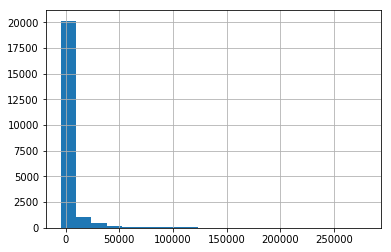

In [49]:
%matplotlib inline
car02.Sales_Past_1Y.hist(bins = 20)

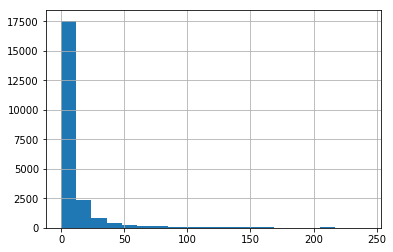

In [50]:
car02.Visit_Past_1Y.hist(bins = 20)

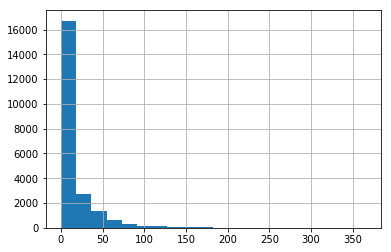

In [51]:
car02.VisitGab_Past_1Y.hist(bins = 20)

In [52]:
car02.head()

,CustomerID,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y,Label
0,17850,0,605.80,4.0,0.0,0.0
1,17850,1,139.12,1.0,0.0,0.0
2,13047,2,629.31,2.0,0.0,0.0
3,13047,3,70.05,1.0,0.0,0.0
4,13047,4,348.78,2.0,0.0,0.0


In [53]:
X = car02.set_index(car02.CustomerID).drop(columns = ["Label"])
X.head()

,CustomerID,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y
CustomerID,,,,,
17850,17850,0,605.80,4.0,0.0
17850,17850,1,139.12,1.0,0.0
13047,13047,2,629.31,2.0,0.0
13047,13047,3,70.05,1.0,0.0
13047,13047,4,348.78,2.0,0.0


In [54]:
X = X.drop(columns = ["CustomerID"])
X.head()

,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y
CustomerID,,,,
17850,0,605.80,4.0,0.0
17850,1,139.12,1.0,0.0
13047,2,629.31,2.0,0.0
13047,3,70.05,1.0,0.0
13047,4,348.78,2.0,0.0


In [55]:
X.shape

(22238, 4)

In [56]:
y = car02['Label']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Label, dtype: float64

In [57]:
y.shape

(22238,)

In [58]:
y.value_counts()

0.0    20572
1.0     1666
Name: Label, dtype: int64

## Model Random forest

In [59]:
## แบ่ง Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101,stratify = y)


In [60]:
from sklearn.ensemble import RandomForestClassifier# ตั้งชื่อตัวแบบว่า "rf" ให้สุ่ม 500 trees

rf = RandomForestClassifier(n_estimators = 500)

In [61]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
rf.feature_importances_

array([0.33828883, 0.34092463, 0.10018544, 0.22060109])

In [63]:
#baseline performance of model without tuning
from sklearn.metrics import f1_score
y_pred_base = rf.predict(X_test)
f1_score(y_test, y_pred_base)

0.05113636363636364

In [64]:
pd.DataFrame(rf.predict_proba(X_test), columns = ["Fail", "Success"])

,Fail,Success
0,0.958,0.042
1,0.990,0.010
2,0.908,0.092
3,0.852,0.148
4,0.938,0.062
5,0.908,0.092
6,0.942,0.058
7,0.958,0.042
8,0.930,0.070
9,0.836,0.164


In [65]:
feature00.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Label
0,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0
1,0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
2,0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0
3,0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
4,0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0


## สร้าง Associate Rule

In [66]:
# สร้างตระกร้าสินค้าตาม เลขที่ Invoice
basket = (feature00
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [67]:
basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# สร้าง Boolean (0,1) 0 คือไม่ได้ซื้อ 1 คือซื้อ. ในแต่ละ Customer ID

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [69]:
basket_sets.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

In [71]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.039522,0.035557,0.023885,0.604333,16.996386,0.022479,2.437513
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.035557,0.039522,0.023885,0.671736,16.996386,0.022479,2.925934
2,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.034069,0.028616,0.020865,0.612434,21.401429,0.019890,2.506368
3,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.028616,0.034069,0.020865,0.729134,21.401429,0.019890,3.566081
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.025056,0.031140,0.020730,0.827338,26.568210,0.019950,5.611313
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.031140,0.025056,0.020730,0.665702,26.568210,0.019950,2.916390
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.035286,0.031140,0.024380,0.690932,22.187826,0.023282,3.134782
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.031140,0.035286,0.024380,0.782923,22.187826,0.023282,4.444115
8,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.072105,0.039252,0.024606,0.341250,8.693843,0.021775,1.458441
9,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.039252,0.072105,0.024606,0.626866,8.693843,0.021775,2.486760


In [72]:
feature00[feature00.Description.str.contains("JUMBO BAG PINK POLKADOT") == 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Label
86,13,22386,JUMBO BAG PINK POLKADOT,10,2010-12-01 09:37:00,1.95,14688,United Kingdom,19.50,0
788,55,22386,JUMBO BAG PINK POLKADOT,1,2010-12-01 12:23:00,1.95,17968,United Kingdom,1.95,0
1427,86,22386,JUMBO BAG PINK POLKADOT,30,2010-12-01 14:11:00,1.95,16456,United Kingdom,58.50,0
1885,122,22386,JUMBO BAG PINK POLKADOT,1,2010-12-01 16:57:00,1.95,14606,United Kingdom,1.95,0
2037,136,22386,JUMBO BAG PINK POLKADOT,10,2010-12-02 09:29:00,1.95,17732,United Kingdom,19.50,0
2323,161,22386,JUMBO BAG PINK POLKADOT,10,2010-12-02 11:02:00,1.95,14388,United Kingdom,19.50,0
3538,240,22386,JUMBO BAG PINK POLKADOT,3,2010-12-02 16:00:00,1.95,17228,United Kingdom,5.85,0
4288,306,22386,JUMBO BAG PINK POLKADOT,20,2010-12-03 12:05:00,1.95,14680,United Kingdom,39.00,0
5846,381,22386,JUMBO BAG PINK POLKADOT,1,2010-12-05 12:13:00,1.95,18118,United Kingdom,1.95,0
6128,390,22386,JUMBO BAG PINK POLKADOT,4,2010-12-05 12:35:00,1.95,17059,United Kingdom,7.80,0


In [76]:
feature03= feature00[(feature00.StockCode == "85099B") | (feature00.StockCode == "22386") ].groupby(["CustomerID", "InvoiceNo", "InvoiceDate"], as_index=False, group_keys=False)\
.agg({ "Sales": "sum" })

feature03.head()

,CustomerID,InvoiceNo,InvoiceDate,Sales
0,12359,16870,2011-10-13 12:47:00,20.8
1,12362,15660,2011-09-28 12:04:00,20.8
2,12362,21878,2011-12-06 15:40:00,20.8
3,12373,2985,2011-02-01 13:10:00,19.5
4,12379,14919,2011-09-19 10:09:00,20.8


In [74]:
feature03.dtypes

CustomerID              int64
InvoiceNo               int64
InvoiceDate    datetime64[ns]
Sales                 float64
dtype: object

In [75]:
feature03.shape

(1974, 4)

In [77]:
feature03 = feature03.sort_values(by = ["InvoiceNo"])

In [79]:
feature03 = feature03.sort_values(by = ["InvoiceDate"])

In [80]:
feature03['Sales_Past_1Y_JUMBOBAGPINK '] = feature03.groupby(['CustomerID'], as_index=False, group_keys=False)\
.apply(get_rolling_sales, '365D', 'Sales').shift().fillna(0)

feature03.head()

,CustomerID,InvoiceNo,InvoiceDate,Sales,Sales_Past_1Y_JUMBOBAGPINK
818,14688,13,2010-12-01 09:37:00,19.5,3012.84
1239,16029,21,2010-12-01 09:57:00,165.0,6.11
1711,17511,25,2010-12-01 10:19:00,165.0,83.20
1879,17908,44,2010-12-01 11:45:00,3.9,2.08
1889,17968,55,2010-12-01 12:23:00,3.9,9.75


In [82]:
car02.head()

,CustomerID,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y,Label
0,17850,0,605.80,4.0,0.0,0.0
1,17850,1,139.12,1.0,0.0,0.0
2,13047,2,629.31,2.0,0.0,0.0
3,13047,3,70.05,1.0,0.0,0.0
4,13047,4,348.78,2.0,0.0,0.0


In [83]:
car02.dtypes

CustomerID            int64
InvoiceNo             int64
Sales_Past_1Y       float64
Visit_Past_1Y       float64
VisitGab_Past_1Y    float64
Label               float64
dtype: object

In [84]:
car03 = car02.merge(feature03, on = ["InvoiceNo"], how = "left")
print(car03.shape)
car03.head()

(22240, 10)


,CustomerID_x,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y,Label,CustomerID_y,InvoiceDate,Sales,Sales_Past_1Y_JUMBOBAGPINK
0,17850,0,605.80,4.0,0.0,0.0,NaN,NaT,NaN,NaN
1,17850,1,139.12,1.0,0.0,0.0,NaN,NaT,NaN,NaN
2,13047,2,629.31,2.0,0.0,0.0,NaN,NaT,NaN,NaN
3,13047,3,70.05,1.0,0.0,0.0,NaN,NaT,NaN,NaN
4,13047,4,348.78,2.0,0.0,0.0,NaN,NaT,NaN,NaN


In [85]:
car03 = car03.drop(columns = ["InvoiceDate", "Sales"]).fillna(0)
car03.head()

,CustomerID_x,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y,Label,CustomerID_y,Sales_Past_1Y_JUMBOBAGPINK
0,17850,0,605.80,4.0,0.0,0.0,0.0,0.0
1,17850,1,139.12,1.0,0.0,0.0,0.0,0.0
2,13047,2,629.31,2.0,0.0,0.0,0.0,0.0
3,13047,3,70.05,1.0,0.0,0.0,0.0,0.0
4,13047,4,348.78,2.0,0.0,0.0,0.0,0.0


In [87]:
car03.dtypes

CustomerID_x                     int64
InvoiceNo                        int64
Sales_Past_1Y                  float64
Visit_Past_1Y                  float64
VisitGab_Past_1Y               float64
Label                          float64
CustomerID_y                   float64
Sales_Past_1Y_JUMBOBAGPINK     float64
dtype: object

In [90]:
car03.head()

,CustomerID_x,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y,Label,CustomerID_y,Sales_Past_1Y_JUMBOBAGPINK
0,17850,0,605.80,4.0,0.0,0.0,0.0,0.0
1,17850,1,139.12,1.0,0.0,0.0,0.0,0.0
2,13047,2,629.31,2.0,0.0,0.0,0.0,0.0
3,13047,3,70.05,1.0,0.0,0.0,0.0,0.0
4,13047,4,348.78,2.0,0.0,0.0,0.0,0.0


In [91]:
car03.columns

Index(['CustomerID_x', 'InvoiceNo', 'Sales_Past_1Y', 'Visit_Past_1Y',
       'VisitGab_Past_1Y', 'Label', 'CustomerID_y',
       'Sales_Past_1Y_JUMBOBAGPINK '],
      dtype='object')

In [92]:
#Rename column name
car03.columns = ['CustomerID', 'InvoiceNo', 'Sales_Past_1Y', 'Visit_Past_1Y',
       'VisitGab_Past_1Y', 'Label', 'CustomerID_y',
       'Sales_Past_1Y_JUMBOBAGPINK']
car03.head()

,CustomerID,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y,Label,CustomerID_y,Sales_Past_1Y_JUMBOBAGPINK
0,17850,0,605.80,4.0,0.0,0.0,0.0,0.0
1,17850,1,139.12,1.0,0.0,0.0,0.0,0.0
2,13047,2,629.31,2.0,0.0,0.0,0.0,0.0
3,13047,3,70.05,1.0,0.0,0.0,0.0,0.0
4,13047,4,348.78,2.0,0.0,0.0,0.0,0.0


In [93]:
car03.columns

Index(['CustomerID', 'InvoiceNo', 'Sales_Past_1Y', 'Visit_Past_1Y',
       'VisitGab_Past_1Y', 'Label', 'CustomerID_y',
       'Sales_Past_1Y_JUMBOBAGPINK'],
      dtype='object')

In [94]:
X = car03.set_index(car03.CustomerID).drop(columns = ["Label","CustomerID_y"])
X.head()

,CustomerID,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y,Sales_Past_1Y_JUMBOBAGPINK
CustomerID,,,,,,
17850,17850,0,605.80,4.0,0.0,0.0
17850,17850,1,139.12,1.0,0.0,0.0
13047,13047,2,629.31,2.0,0.0,0.0
13047,13047,3,70.05,1.0,0.0,0.0
13047,13047,4,348.78,2.0,0.0,0.0


In [95]:
X = X.drop(columns = ["CustomerID"])
X.head()

,InvoiceNo,Sales_Past_1Y,Visit_Past_1Y,VisitGab_Past_1Y,Sales_Past_1Y_JUMBOBAGPINK
CustomerID,,,,,
17850,0,605.80,4.0,0.0,0.0
17850,1,139.12,1.0,0.0,0.0
13047,2,629.31,2.0,0.0,0.0
13047,3,70.05,1.0,0.0,0.0
13047,4,348.78,2.0,0.0,0.0


In [96]:
X.shape

(22240, 5)

In [97]:
y = car03['Label']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Label, dtype: float64

In [98]:
y.value_counts()

0.0    20572
1.0     1668
Name: Label, dtype: int64

In [99]:
y.shape

(22240,)

## Propensity Model (Model Random forest )

In [100]:
## แบ่ง Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101,stratify = y)


In [101]:
from sklearn.ensemble import RandomForestClassifier# ตั้งชื่อตัวแบบว่า "rf" ให้สุ่ม 500 trees

rf = RandomForestClassifier(n_estimators = 500)

In [102]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
rf.feature_importances_

array([0.044302  , 0.04559983, 0.02143976, 0.03478306, 0.85387534])

In [104]:
#baseline performance of model without tuning
from sklearn.metrics import f1_score
y_pred = rf.predict(X_test)
f1_score(y_test, y_pred)

0.883468834688347

In [108]:
Propensityresult = pd.DataFrame(rf.predict_proba(X_test), columns = ["Fail", "Success"],index = X_test.index)


In [112]:
Propensityresult.head(20)

,Fail,Success
CustomerID,,
17705,1.000,0.000
17772,1.000,0.000
17340,1.000,0.000
12963,1.000,0.000
16191,1.000,0.000
16610,1.000,0.000
15039,1.000,0.000
12748,0.530,0.470
14415,0.098,0.902


## Save & Load Model

In [113]:
Propensityresult.to_csv("Propensityresult.csv")

In [114]:
import pickle
# Dump Model
file = open("propensity_model_dumped.pkl", "wb")
pickle.dump(rf, file)

In [115]:
# Loaded Model
file = open("propensity_model_dumped.pkl", "rb")
propensitymodel_loaded = pickle.load(file)

In [116]:
propensitymodel_loaded.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
Propensityresult2 = pd.DataFrame(propensitymodel_loaded.predict_proba(X_test), columns = ["Fail", "Success"],index = X_test.index)

In [118]:
Propensityresult2.head(20)

,Fail,Success
CustomerID,,
17705,1.000,0.000
17772,1.000,0.000
17340,1.000,0.000
12963,1.000,0.000
16191,1.000,0.000
16610,1.000,0.000
15039,1.000,0.000
12748,0.522,0.478
14415,0.104,0.896
